In [ ]:
#!pip install gradio

In [ ]:
import time
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/fake reviews data.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfortable. I love it!Very pretty"
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I've had mine for a couple of years"
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and feel of this pillow.
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it is a great product for the price! I"
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the set for two months now and have not been


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()


,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.shape

(40432, 4)

In [ ]:
df['rating'].value_counts()

rating
5    24559
4     7965
3     3786
1     2155
2     1967
Name: count, dtype: int64

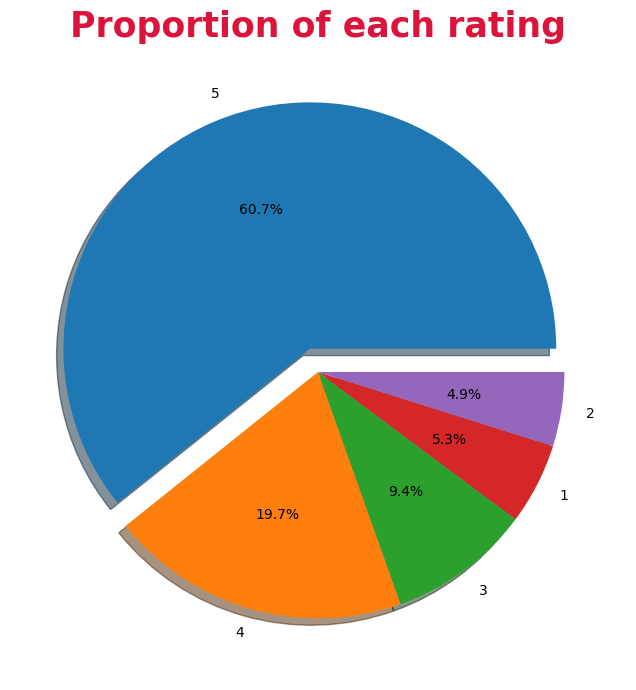

In [ ]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [ ]:
df['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

In [ ]:
df = pd.read_csv('/content/fake reviews data.csv', names=['category', 'rating', 'label', 'text'])
df['text'] = df['text'].str.replace('\n', ' ')
df['target'] = np.where(df['label']=='CG', 1, 0)

In [ ]:
Target_counts = df['target'].value_counts()
print(Target_counts)

target
0    20217
1    20216
Name: count, dtype: int64


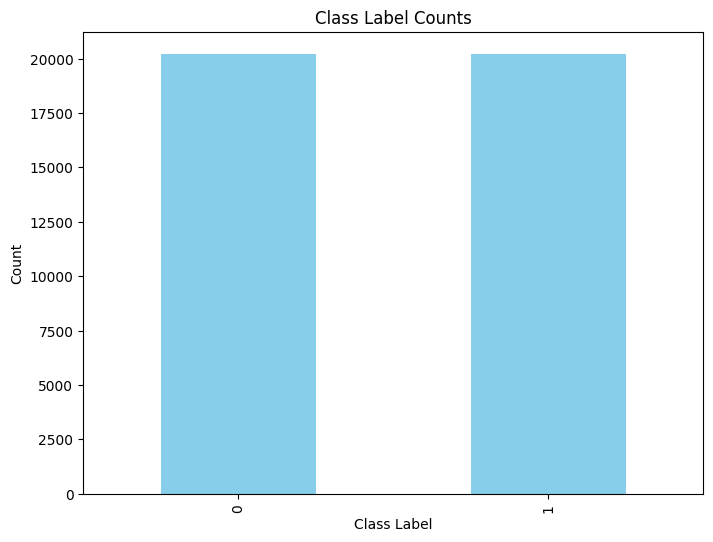

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
Target_counts.plot(kind='bar', color='skyblue')
plt.title('Class Label Counts')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [ ]:
w

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

# Create a Pipeline with Vectorizer and Random Forest Classifier
text_clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', RandomForestClassifier())
])



# Fit the Model and Evaluate
text_clf.fit(X_train, y_train)

# Predictions
y_pred = text_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8454309385433412
Classification Report:
               precision    recall  f1-score   support

          CG       0.80      0.92      0.85      4016
          OR       0.90      0.78      0.83      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.84      8087
weighted avg       0.85      0.85      0.84      8087



Confusion Matrix:
 [[3678  338]
 [ 912 3159]]


<Axes: >

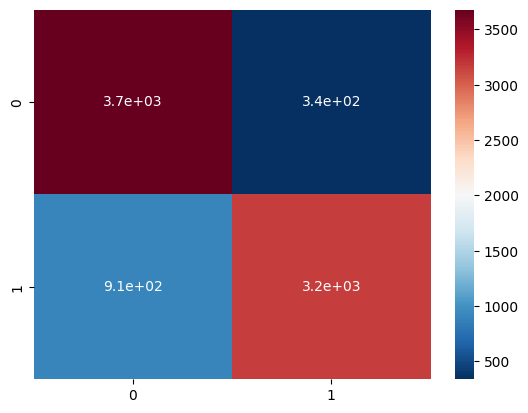

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='RdBu_r')

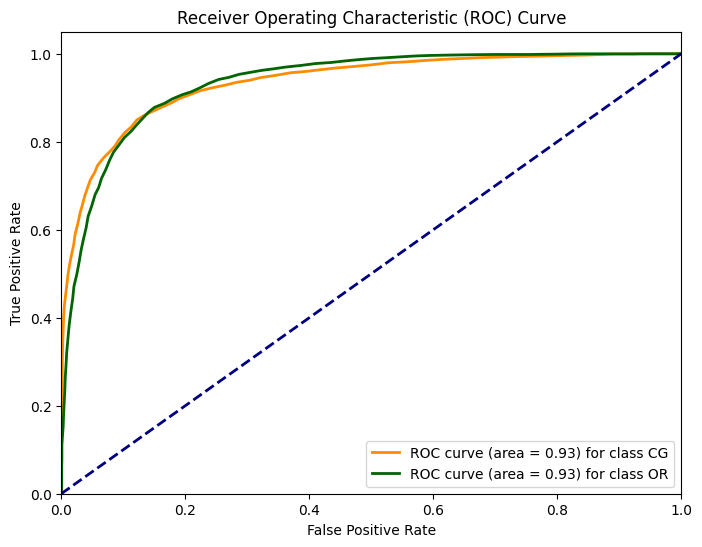

In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = text_clf.predict_proba(X_test)



# Plot ROC curve for class 'CG'
fpr_cg, tpr_cg, _ = roc_curve(y_test == 'CG', y_pred_probs[:, 0], pos_label=True)
roc_auc_cg = auc(fpr_cg, tpr_cg)

# Plot ROC curve for class 'OR'
fpr_or, tpr_or, _ = roc_curve(y_test == 'OR', y_pred_probs[:, 1], pos_label=True)
roc_auc_or = auc(fpr_or, tpr_or)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_cg, tpr_cg, color='darkorange', lw=2, label='ROC curve (area = %0.2f) for class CG' % roc_auc_cg)
plt.plot(fpr_or, tpr_or, color='darkgreen', lw=2, label='ROC curve (area = %0.2f) for class OR' % roc_auc_or)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




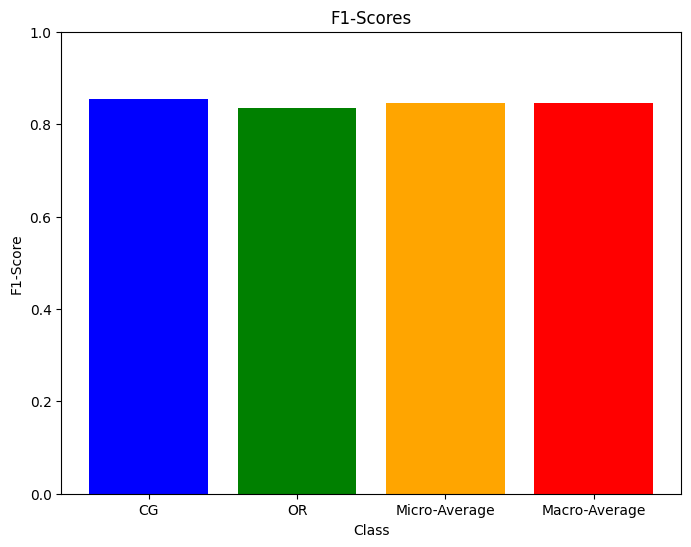

In [ ]:
# Compute F1-score for each class
f1_scores = f1_score(y_test, y_pred, labels=['CG', 'OR'], average=None)

# Compute micro-average F1-score
f1_micro = f1_score(y_test, y_pred, average='micro')

# Compute macro-average F1-score
f1_macro = f1_score(y_test, y_pred, average='macro')
# # Plot F1-scores
plt.figure(figsize=(8, 6))
labels = ['CG', 'OR', 'Micro-Average', 'Macro-Average']
f1_scores = np.append(f1_scores, [f1_micro, f1_macro])
plt.bar(labels, f1_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Scores')
plt.ylim(0, 1)
plt.show()

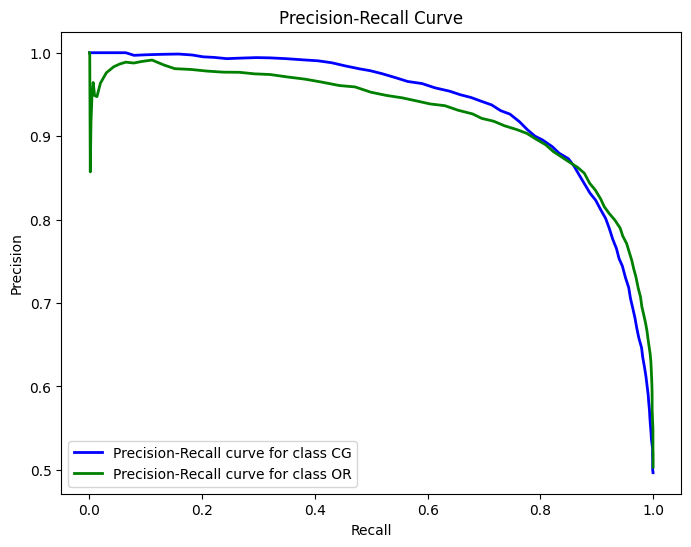

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision and recall for each class
precision_cg, recall_cg, _ = precision_recall_curve(y_test == 'CG', y_pred_probs[:, 0], pos_label=True)
precision_or, recall_or, _ = precision_recall_curve(y_test == 'OR', y_pred_probs[:, 1], pos_label=True)

# Plot precision-recall curve for class 'CG'
plt.figure(figsize=(8, 6))
plt.plot(recall_cg, precision_cg, color='blue', lw=2, label='Precision-Recall curve for class CG')

# Plot precision-recall curve for class 'OR'
plt.plot(recall_or, precision_or, color='green', lw=2, label='Precision-Recall curve for class OR')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
from sklearn.svm import SVC
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

# Create a Pipeline with Vectorizer and Random Forest Classifier
text_clf = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', SVC(kernel='linear'))  # You can adjust the kernel and other parameters as needed
    ])



# Fit the Model and Evaluate
text_clf.fit(X_train, y_train)

# Predictions
y_pred = text_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='RdBu_r')

In [ ]:
# from sklearn.metrics import roc_curve, auc, f1_score
# import numpy as np
# import matplotlib.pyplot as plt

# # Predict probabilities
# y_pred_probs = text_clf.predict_proba(X_test)



# # Plot ROC curve for class 'CG'
# fpr_cg, tpr_cg, _ = roc_curve(y_test == 'CG', y_pred_probs[:, 0], pos_label=True)
# roc_auc_cg = auc(fpr_cg, tpr_cg)

# # Plot ROC curve for class 'OR'
# fpr_or, tpr_or, _ = roc_curve(y_test == 'OR', y_pred_probs[:, 1], pos_label=True)
# roc_auc_or = auc(fpr_or, tpr_or)

# # Plot ROC curves
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_cg, tpr_cg, color='darkorange', lw=2, label='ROC curve (area = %0.2f) for class CG' % roc_auc_cg)
# plt.plot(fpr_or, tpr_or, color='darkgreen', lw=2, label='ROC curve (area = %0.2f) for class OR' % roc_auc_or)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to your target labels
label_encoder.fit(y_train)

# Transform target labels to numerical values
y_test_encoded = label_encoder.transform(y_test)

# Now y_test_encoded will contain numerical labels (0 and 1) instead of 'CG' and 'OR'

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# # Compute F1-score for each class
# f1_scores = f1_score(y_test, y_pred, labels=['CG', 'OR'], average=None)

# # Compute micro-average F1-score
# f1_micro = f1_score(y_test, y_pred, average='micro')

# # Compute macro-average F1-score
# f1_macro = f1_score(y_test, y_pred, average='macro')
# # # Plot F1-scores
# plt.figure(figsize=(8, 6))
# labels = ['CG', 'OR', 'Micro-Average', 'Macro-Average']
# f1_scores = np.append(f1_scores, [f1_micro, f1_macro])
# plt.bar(labels, f1_scores, color=['blue', 'green', 'orange', 'red'])
# plt.xlabel('Class')
# plt.ylabel('F1-Score')
# plt.title('F1-Scores')
# plt.ylim(0, 1)
# plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision and recall for each class
precision_cg, recall_cg, _ = precision_recall_curve(y_test == 'CG', y_pred_probs[:, 0], pos_label=True)
precision_or, recall_or, _ = precision_recall_curve(y_test == 'OR', y_pred_probs[:, 1], pos_label=True)

# Plot precision-recall curve for class 'CG'
plt.figure(figsize=(8, 6))
plt.plot(recall_cg, precision_cg, color='blue', lw=2, label='Precision-Recall curve for class CG')

# Plot precision-recall curve for class 'OR'
plt.plot(recall_or, precision_or, color='green', lw=2, label='Precision-Recall curve for class OR')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Create a Pipeline with Vectorizer and Multinomial Naive Bayes Classifier
text_clf = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ])

# Fit the Model and Evaluate
text_clf.fit(X_train, y_train)

# Predictions
y_pred = text_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='RdBu_r')

In [ ]:
# from sklearn.metrics import roc_curve, auc, f1_score
# import numpy as np
# import matplotlib.pyplot as plt

# # Predict probabilities
# y_pred_probs = text_clf.predict_proba(X_test)



# # Plot ROC curve for class 'CG'
# fpr_cg, tpr_cg, _ = roc_curve(y_test == 'CG', y_pred_probs[:, 0], pos_label=True)
# roc_auc_cg = auc(fpr_cg, tpr_cg)

# # Plot ROC curve for class 'OR'
# fpr_or, tpr_or, _ = roc_curve(y_test == 'OR', y_pred_probs[:, 1], pos_label=True)
# roc_auc_or = auc(fpr_or, tpr_or)

# # Plot ROC curves
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_cg, tpr_cg, color='darkorange', lw=2, label='ROC curve (area = %0.2f) for class CG' % roc_auc_cg)
# plt.plot(fpr_or, tpr_or, color='darkgreen', lw=2, label='ROC curve (area = %0.2f) for class OR' % roc_auc_or)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to your target labels
label_encoder.fit(y_train)

# Transform target labels to numerical values
y_test_encoded = label_encoder.transform(y_test)

# Now y_test_encoded will contain numerical labels (0 and 1) instead of 'CG' and 'OR'

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# # Compute F1-score for each class
# f1_scores = f1_score(y_test, y_pred, labels=['CG', 'OR'], average=None)

# # Compute micro-average F1-score
# f1_micro = f1_score(y_test, y_pred, average='micro')

# # Compute macro-average F1-score
# f1_macro = f1_score(y_test, y_pred, average='macro')
# # # Plot F1-scores
# plt.figure(figsize=(8, 6))
# labels = ['CG', 'OR', 'Micro-Average', 'Macro-Average']
# f1_scores = np.append(f1_scores, [f1_micro, f1_macro])
# plt.bar(labels, f1_scores, color=['blue', 'green', 'orange', 'red'])
# plt.xlabel('Class')
# plt.ylabel('F1-Score')
# plt.title('F1-Scores')
# plt.ylim(0, 1)
# plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision and recall for each class
precision_cg, recall_cg, _ = precision_recall_curve(y_test == 'CG', y_pred_probs)
precision_or, recall_or, _ = precision_recall_curve(y_test == 'OR', y_pred_probs)

# Plot precision-recall curve for class 'CG'
plt.figure(figsize=(8, 6))
plt.plot(recall_cg, precision_cg, color='blue', lw=2, label='Precision-Recall curve for class CG')

# Plot precision-recall curve for class 'OR'
plt.plot(recall_or, precision_or, color='green', lw=2, label='Precision-Recall curve for class OR')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
d3=df[8635:8675].copy()
d3['predicted'] = d3['processed_text'].apply(lambda x: text_clf.predict([x])[0])

# Display the DataFrame
print(d3[['category', 'label', 'predicted']])

           category label predicted
8635  Electronics_5    OR        OR
8636  Electronics_5    OR        OR
8637  Electronics_5    OR        OR
8638  Electronics_5    OR        OR
8639  Electronics_5    OR        CG
8640  Electronics_5    OR        OR
8641  Electronics_5    OR        OR
8642  Electronics_5    OR        OR
8643  Electronics_5    OR        OR
8644  Electronics_5    OR        OR
8645  Electronics_5    OR        OR
8646  Electronics_5    OR        OR
8647  Electronics_5    OR        CG
8648  Electronics_5    CG        OR
8649  Electronics_5    CG        CG
8650  Electronics_5    CG        CG
8651  Electronics_5    CG        CG
8652  Electronics_5    CG        CG
8653  Electronics_5    CG        CG
8654  Electronics_5    CG        CG
8655  Electronics_5    CG        CG
8656  Electronics_5    CG        CG
8657  Electronics_5    CG        CG
8658  Electronics_5    CG        OR
8659  Electronics_5    CG        CG
8660  Electronics_5    CG        CG
8661  Electronics_5    CG   

In [ ]:
def train_model(df):
    X_train, y_train = df['processed_text'], df['label']

    text_clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', RandomForestClassifier())])



    # Fit the Model and Evaluate
    text_clf.fit(X_train, y_train)

    return text_clf

def predict_class(text, model, preprocess_func):
    processed_text = preprocess_func(text)
    predicted_class = model.predict([processed_text])[0]
    return predicted_class


# Load Data
df = pd.read_csv('/content/fake reviews data.csv')
df['processed_text'] = df['text_'].apply(preprocess_text)

# Train the model
trained_model = train_model(df)




In [ ]:
# # Sample text for prediction
# input_text = "I really enjoy using this product. It exceeded my expectations."

# # Predict class for the input text
# predicted_class = predict_class(input_text, trained_model, preprocess_text)

# # Print the predicted class
# print("Predicted Class:", predicted_class)

In [ ]:
input_text = "Easy to use. Seems to be an easy way to make a smoothie for a small person."

# Predict class for the input text
predicted_class = predict_class(input_text, trained_model, preprocess_text)

# Print the predicted class
print("Predicted Class:", predicted_class)


Predicted Class: CG
